In [84]:
import math
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

Question 1

(a)

In [93]:
x = np.linspace(0, 0.2, 100)   #choose 0.2 as our x bar

In [94]:
y = special.erf(250 * math.sqrt(30)*x / 9) - 3/7   #This is our f(x)

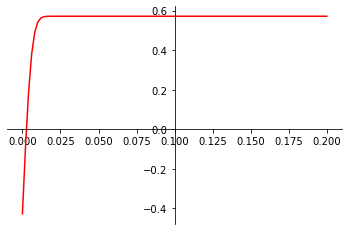

In [95]:
#create the axis and plot the function
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y,'r')
plt.show()

(b)

In [101]:
# function
def f(x):
    #f(x)
    fval = math.erf(250 * math.sqrt(30)*x / 9) - 3/7        
    #f'(x)
    fderiv = 2.5 * 10**6 * x *math.exp(-625000 * x**2 / 27) / (27 * math.sqrt(math.pi))
    return fval, fderiv

In [102]:
# Bisection Method
def bisection(f, a, b, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.
 
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return the value or the value, derivative
    a,b : numbers
        Interval in which to search for a solution. bisection returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | a - b | < tolx
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(0.5*(a+b)) | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    a,b : numbers
        f(a)*f(b) < 0; a root of f is located in (a, b)
    x : numbers
        0.5*(a+b) approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, a, b, c, fc]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf

    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    '''
    
    if b < a :
        t = a
        a = b
        b = t
    
    fa = f(a)
    fb = f(b)
    if( isinstance(fa, tuple) ):
        fa = fa[0]
    if( isinstance(fb, tuple) ):
        fb = fb[0]
        
    # check if a and b bound a root
    if fa*fb >= 0 :
        raise Exception(
         "The scalars a and b do not bound a root")
    
    it    = 0
    iflag = 0
    c = 0.5*(a+b)
    fc = f(c)
    if( isinstance(fc, tuple) ):
        fc = fc[0]
    ithist = np.array([it, a, b, c, fc])

    while( it < maxit and abs(b-a) > tolx and abs(fc) > tolf ):
        it = it+1;
        if fa*fc < 0 :
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        c  = 0.5*(a+b)
        fc = f(c)
        if( isinstance(fc, tuple) ):
            fc = fc[0]
            
        ithist = np.vstack((ithist, np.array([it, a, b, c, fc]) ))

    # check why the bisection method truncated and set iflag
    if abs(b-a) > tolx and abs(fc) > tolf :
        # method truncated because maximum number of iterations reached
        iflag = 1
    
    return a, b, c, ithist, iflag
    

In [103]:
# run Bisection
a, b, x, ithist, iflag = bisection(f, 0, 0.2, tolf = 1.e-7)
print(f' Bisection method returned with iflag = {iflag:1d}')
print(' iter       a             b             c           f(c) ')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}  {ithist[i,4]:13.6e}')


 Bisection method returned with iflag = 0
 iter       a             b             c           f(c) 
   0   0.000000e+00   2.000000e-01   1.000000e-01   5.714286e-01
   1   0.000000e+00   1.000000e-01   5.000000e-02   5.714286e-01
   2   0.000000e+00   5.000000e-02   2.500000e-02   5.714285e-01
   3   0.000000e+00   2.500000e-02   1.250000e-02   5.642742e-01
   4   0.000000e+00   1.250000e-02   6.250000e-03   3.927342e-01
   5   0.000000e+00   6.250000e-03   3.125000e-03   7.009500e-02
   6   0.000000e+00   3.125000e-03   1.562500e-03  -1.652941e-01
   7   1.562500e-03   3.125000e-03   2.343750e-03  -4.262573e-02
   8   2.343750e-03   3.125000e-03   2.734375e-03   1.512704e-02
   9   2.343750e-03   2.734375e-03   2.539063e-03  -1.341792e-02
  10   2.539063e-03   2.734375e-03   2.636719e-03   9.396223e-04
  11   2.539063e-03   2.636719e-03   2.587891e-03  -6.218153e-03
  12   2.587891e-03   2.636719e-03   2.612305e-03  -2.633982e-03
  13   2.612305e-03   2.636719e-03   2.624512e-03  -8.4

The approximate depth is 2.630281 * 10^-3 meter.

(c)

In [104]:
# Regular Falsi
def regulafalsi(f, a, b, tolx = 1.e-7, tolf = 1.e-7, maxit = 100 ): 
    '''Approximate solution of f(x)=0 on interval [a,b] by Regula Falsi.
    
    Parameters
    ----------
    f : function
        Function for which we wan to to find a root.
        The call f(x)  should return the value or the value, derivative
    a,b : numbers
        Interval in which to search for a solution. bisection returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    tolx : number (optional, default = 1.e-7)
        Algorithm stops when | a - b | < tolx
    tolf : number (optional, default = 1.e-7)
        Algorithm stops when | f(0.5*(a+b)) | < tolf
    maxit: integer (optional, default = 100)
        maximjm number of iterations
        

    Returns
    -------
    a,b : numbers
        f(a)*f(b) < 0; a root of f is located in (a, b)
    x : numbers
        0.5*(a+b) approximation of the root.
    ithist : np.array 
        iteration history; i-th row of ithist contains [it, a, b, c, fc]
    ifag : integer
        return flag
        iflag = 0   if |b-a| <= tolx, or   | f(x) | <= tolf
        iflag =  1  iteration terminated because maximum number of
                    iterations was reached. |b-a| > tolx, |f(x)| > tolf


    Matthias Heinkenschloss
    Department of Computational and Applied Mathematics
    Rice University
    August 29, 2021
    '''
    
    if b < a :
        t = a
        a = b
        b = t
    
    fa = f(a)
    fb = f(b)
    if( isinstance(fa, tuple) ):
        fa = fa[0]
    if( isinstance(fb, tuple) ):
        fb = fb[0]
        
    # check if a and b bound a root
    if fa*fb >= 0 :
        raise Exception(
         "The scalars a and b do not bound a root")
    
    it    = 0
    iflag = 0
    c = a - fa * (b-a)/(fb-fa)
    fc = f(c)
    if( isinstance(fc, tuple) ):
        fc = fc[0]
    ithist = np.array([it, a, b, c, fc])

    while( it < maxit and abs(b-a) > tolx and abs(fc) > tolf ):
        it = it+1;
        if fa*fc < 0 :
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        c = a - fa * (b-a)/(fb-fa)
        fc = f(c)
        if( isinstance(fc, tuple) ):
            fc = fc[0]
            
        ithist = np.vstack((ithist, np.array([it, a, b, c, fc]) ))

    # check why the bisection method truncated and set iflag
    if abs(b-a) > tolx and abs(fc) > tolf :
        # bisection method truncated because maximum number of iterations reached
        iflag = 1
    
    return a, b, c, ithist, iflag
    
 

In [105]:
# run Regula Falsi
a, b, x, ithist, iflag = regulafalsi(f, 0, 0.2, tolf = 1.e-7)
print(f' Regula Falsi returned with iflag = {iflag:1d}')
print(' iter       a             b             c           f(c) ')
for i in np.arange(ithist.shape[0]):
    print(f' {ithist[i,0]:3.0f}  {ithist[i,1]:13.6e}  {ithist[i,2]:13.6e}  {ithist[i,3]:13.6e}  {ithist[i,4]:13.6e}')



 Regula Falsi returned with iflag = 0
 iter       a             b             c           f(c) 
   0   0.000000e+00   2.000000e-01   8.571429e-02   5.714286e-01
   1   0.000000e+00   8.571429e-02   3.673469e-02   5.714286e-01
   2   0.000000e+00   3.673469e-02   1.574344e-02   5.707231e-01
   3   0.000000e+00   1.574344e-02   6.751952e-03   4.251462e-01
   4   0.000000e+00   6.751952e-03   3.389521e-03   1.056158e-01
   5   0.000000e+00   3.389521e-03   2.719368e-03   1.295813e-02
   6   0.000000e+00   2.719368e-03   2.639560e-03   1.354774e-03
   7   0.000000e+00   2.639560e-03   2.631242e-03   1.388812e-04
   8   0.000000e+00   2.631242e-03   2.630390e-03   1.420774e-05
   9   0.000000e+00   2.630390e-03   2.630302e-03   1.453166e-06
  10   0.000000e+00   2.630302e-03   2.630293e-03   1.486264e-07
  11   0.000000e+00   2.630293e-03   2.630293e-03   1.520112e-08


The approximate depth is 2.630293 * 10^-3.